In [8]:
import tweepy 
import numpy as np 
import csv
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect('tweets.db')
c = conn.cursor()

data = pd.read_sql('select * from crypto where geo not null ',conn)
#data.to_csv("word_cloud_tweets.csv")
data.geo.head()

0    {"coordinates": [43.45465, -80.51827], "type":...
1    {"coordinates": [43.4642578, -80.5204096], "ty...
2    {"coordinates": [43.4642578, -80.5204096], "ty...
3    {"coordinates": [43.4642578, -80.5204096], "ty...
4    {"coordinates": [43.450301, -80.4831917], "typ...
Name: geo, dtype: object

In [7]:
data.dtypes

id                    int64
retweet_count         int64
user_location        object
id_str               object
user_name            object
user_created         object
geo                  object
subjectivity        float64
coordinates          object
user_followers        int64
user_bg_color        object
text                 object
created              object
polarity            float64
user_description     object
dtype: object

In [20]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [32]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['text'] ])

# We display the updated dataframe with the new column:
data.head()
#data.to_csv("rocket_ship.csv")

,id,retweet_count,user_location,id_str,user_name,user_created,geo,subjectivity,coordinates,user_followers,user_bg_color,text,created,polarity,user_description,SA
0,12,0,"Kitchener, Ontario",962536738362081280,_xoanniee,2017-10-18 22:37:38.000000,None,0.100,None,55,F5F8FA,Rip aunt Faye I barely knew you but you were s...,2018-02-11 04:00:16.000000,0.050000,Virgo•20•,1
1,14,0,"Kitchener, Ontario",962537162091634688,MugatuMofos,2012-07-19 03:18:19.000000,None,0.000,None,224,000408,Why don't you just order a nuke strike against...,2018-02-11 04:01:57.000000,0.000000,"I became insane, with long intervals of horrib...",0
2,29,0,"Kitchener, Ontario",962539868545937408,MugatuMofos,2012-07-19 03:18:19.000000,None,0.000,None,224,000408,@MrAlexisPereira Thank you for your service! (...,2018-02-11 04:12:42.000000,0.000000,"I became insane, with long intervals of horrib...",0
3,37,0,"Kitchener, Ontario",962540929268805638,MugatuMofos,2012-07-19 03:18:19.000000,None,0.375,None,224,000408,@MrAlexisPereira I just realized there is no S...,2018-02-11 04:16:55.000000,-0.305176,"I became insane, with long intervals of horrib...",-1
4,46,0,"Kitchener, Ontario",962542362798034944,AccidentalCDN,2013-02-26 09:59:51.000000,None,1.000,None,388,DBE9ED,@AnnMantini @KMacTWN Sorry...I had to. Smelt i...,2018-02-11 04:22:37.000000,-0.500000,"Writer - ""Accidental Canadian"" coming out in S...",-1


In [33]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] < 0]

In [34]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['text'])))

Percentage of positive tweets: 28.089887640449437%
Percentage of neutral tweets: 57.30337078651685%
Percentage de negative tweets: 14.606741573033707%


In [35]:
sen_pos = format(len(pos_tweets)*100/len(data['text']))
sen_neu = format(len(neu_tweets)*100/len(data['text']))
sen_neg = format(len(neg_tweets)*100/len(data['text']))

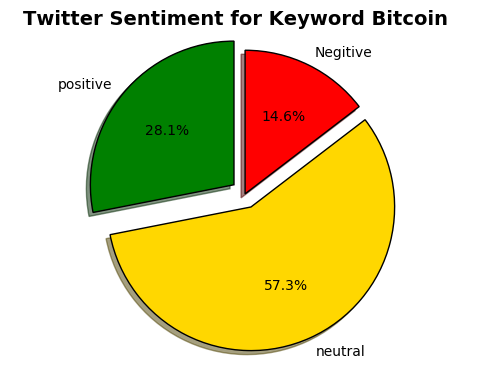

In [36]:
fig = plt.figure()
fig.suptitle('Twitter Sentiment for Keyword Bitcoin', fontsize=14, fontweight='bold')

labels = "positive","neutral","Negitive"
sizes = [sen_pos,sen_neu,sen_neg]
colors = ['green', 'gold', 'red']
explode = (0.1,0.1,0)  # "explode" Slices for looks

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()